In [1]:
conda install scikit-learn

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [21]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Text(0, 0.5, 'Numbaer of houses')

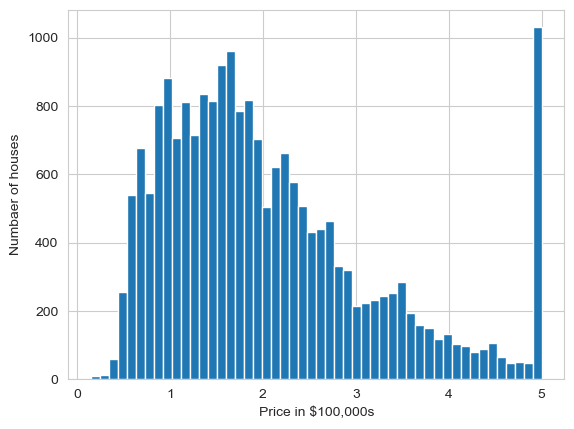

In [5]:
plt.hist(housing.target, bins=50)
plt.xlabel('Price in $100,000s')
plt.ylabel('Numbaer of houses')

In [6]:
housing_df = DataFrame(housing.data)

housing_df.columns=housing.feature_names
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
housing_df.shape

(20640, 8)

In [8]:
housing_df['Price'] =housing.target

Text(0.5, 0, 'Numbaer of houses')

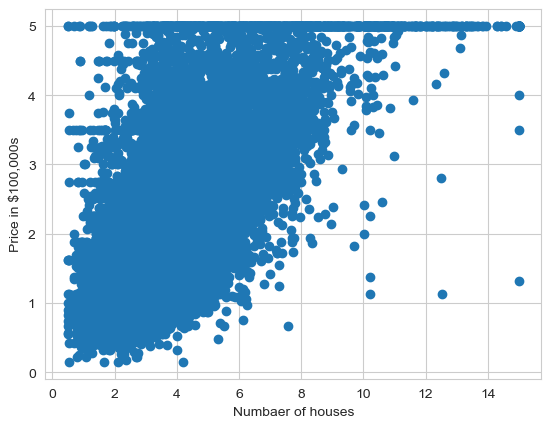

In [9]:
plt.scatter(housing_df['MedInc'], housing_df['Price'])
plt.ylabel('Price in $100,000s')
plt.xlabel('Numbaer of houses')

In [10]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


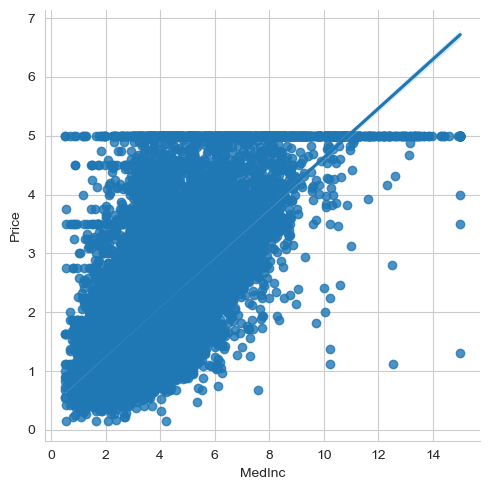

In [11]:
sns.lmplot(housing_df, x='MedInc', y='Price')

In [12]:
X = housing_df['MedInc']
print(X.shape)
X

(20640,)


0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64

In [13]:
X =np.vstack(X)
print(X.shape)
X

(20640, 1)


array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

In [14]:
Y=housing_df['Price']

In [15]:
Y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [16]:
X=np.array([[value[0],1]for value in X])
X

array([[8.3252, 1.    ],
       [8.3014, 1.    ],
       [7.2574, 1.    ],
       ...,
       [1.7   , 1.    ],
       [1.8672, 1.    ],
       [2.3886, 1.    ]])

In [17]:
a, b = np.linalg.lstsq(X,Y)[0]

/var/folders/bs/29hp6g7n5yqd4mn0sxfstv6h0000gn/T/ipykernel_40620/2352769741.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, b = np.linalg.lstsq(X,Y)[0]


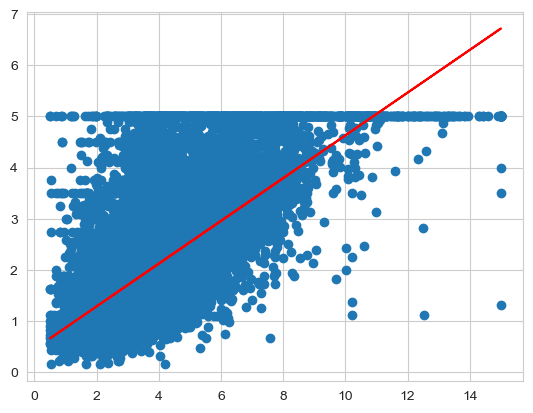

In [18]:
plt.plot(housing_df['MedInc'], housing_df['Price'], 'o')

x=housing_df['MedInc']
plt.plot(x, a*x+b, 'r')

In [19]:
result = np.linalg.lstsq(X,Y)

/var/folders/bs/29hp6g7n5yqd4mn0sxfstv6h0000gn/T/ipykernel_40620/315853482.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result = np.linalg.lstsq(X,Y)


In [20]:
error_total = result[1]
rmse = np.sqrt(error_total/len(X))
print(f'平均二乗誤差の平方根は、{rmse[0]:0.2f}')

平均二乗誤差の平方根は、0.84


In [21]:
import sklearn
from sklearn.linear_model import LinearRegression

In [22]:
lreg = LinearRegression()

In [29]:
X_multi = housing_df.drop('Price',axis =1)
Y_target = housing_df['Price']

In [30]:
lreg.fit(X_multi, Y_target)

LinearRegression()

In [31]:
print(f'切片は{lreg.intercept_:0.2f}')

切片は-36.94


In [32]:
print(f' 係数の数は{len(lreg.coef_)}個')

 係数の数は8個


In [33]:
coeff_df = DataFrame(housing.feature_names,
                     columns = ['Features'])
coeff_df["Coefficient Estimate"] = lreg.coef_

coeff_df

,Features,Coefficient Estimate
0,MedInc,0.436693
1,HouseAge,0.009436
2,AveRooms,-0.107322
3,AveBedrms,0.645066
4,Population,-0.000004
5,AveOccup,-0.003787
6,Latitude,-0.421314
7,Longitude,-0.434514


In [36]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi, housing_df['Price'])

In [37]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(15480, 8) (5160, 8) (15480,) (5160,)


In [39]:
Lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression()

In [40]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [44]:
print('X_trainを使ったモデルの平均二乗誤差={:0.2f}'.format(np.mean((Y_train-pred_train)**2)))
print('X_testを使ったモデルの平均二乗誤差={:0.2f}'.format(np.mean((Y_test-pred_test)**2)))

X_trainを使ったモデルの平均二乗誤差=0.51
X_testを使ったモデルの平均二乗誤差=0.56


Text(0.5, 1.0, 'Residual Plots')

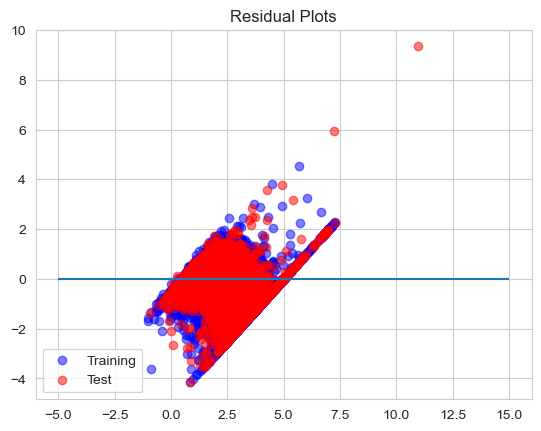

In [56]:
 train = plt.scatter(pred_train,
                    (pred_train-Y_train),
                    c='b',
                     alpha=0.5)
    
test = plt.scatter(pred_test,
                  (pred_test-Y_test),
                  c='r', alpha=0.5)

plt.hlines(y=0, xmin=-5, xmax=15)

plt.legend((train, test), ('Training', 'Test'), loc='lower left')
plt.title('Residual Plots')